# Notebook to generate plotter compatible files that use the idraw2 from uuna tek

This notebook is a guide to get a graphviz visualisation and plot it using hershey text using the idraw 2 plotter.

This was adapted from this tutorial, and updated (for instance using yaml for the gcode generation)

https://github.com/gamk67/idraw2linux/blob/925073a5b550bf1b0b20225f7e604967682c622d/README.md

https://github.com/domoszlai/juicy-gcode

you will need to install vpype and juicy_gcode for the plotting, we directly use serial

## Graphviz

### Create a graphviz for webpage calculation

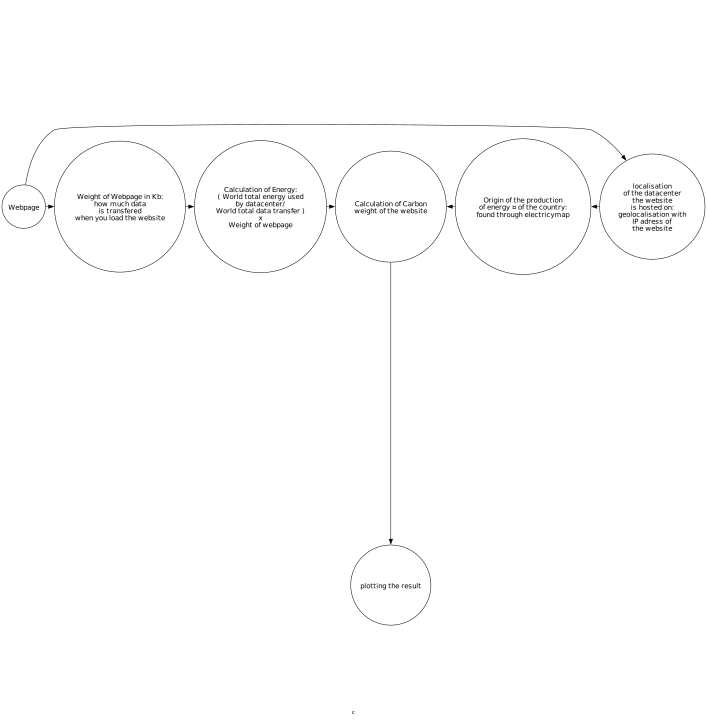

In [7]:
import graphviz

# Create a new directed graph

dot = graphviz.Digraph('pet-shop', node_attr={'fontname': 'Hershey-Noailles-futura'})
dot.attr(bgcolor='transparent')
dot.attr( size="10,10", ratio="fill",label="c")
dot.attr(splines='true')
#dot.attr(splines='curve')

#dot.graph_attr['splines'] = 'true'
dot.attr('edge', arrowsize="1", dir="head",fontname = "menlo", overlap="False",color="black", weight="2",gradientangle="90",constraint='false')
dot.attr('node', stroke="2", size='30',shape='circle', orientation="-90")

# Add nodes and edges based on the sketch
dot.node('webpage', 'Webpage')
dot.node('weight', 'Weight of Webpage in Kb: \n how much data \nis transfered \n when you load the website')
dot.node('energy', 'Calculation of Energy: \n ( World total energy used \nby datacenter/ \nWorld total data transfer ) \n x \nWeight of webpage ')
dot.node('origin', 'localisation \nof the datacenter \n the website \nis hosted on: \n geolocalisation with \n IP adress of \nthe website')
dot.node('carbon', 'Calculation of Carbon \nweight of the website')
dot.node('plot', 'plotting the result')
dot.node('production', 'Origin of the production \n of energy ¤ of the country:\n found through electricymap')

# Create edges between nodes
dot.edge('webpage', 'weight')
dot.edge('webpage', 'origin')
dot.edge('weight', 'energy')
dot.edge('origin', 'production')
dot.edge('energy', 'carbon')
dot.edge('production', 'carbon')
dot.edge('carbon', 'plot',constraint='true')

# Display the graph

dot


### Create graphviz for characters

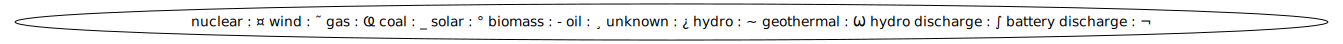

In [8]:
#Use the different characters that are related to the different energy sources
dot_charact = graphviz.Digraph('pet-shop', node_attr={'fontname': 'Hershey-Noailles-futura'})

dot_charact.node('example', "nuclear : ¤ wind : ˜ gas : Ҩ coal : _ solar : ° biomass : - oil : ¸ unknown : ¿ hydro : ~ geothermal : Ѡ hydro discharge : ∫ battery discharge : ¬")

dot_charact

In [9]:
# save the graph
dot.render('output_graphviz', format='svg')

'output_graphviz.svg'

### Create graphviz for total carbon calculus

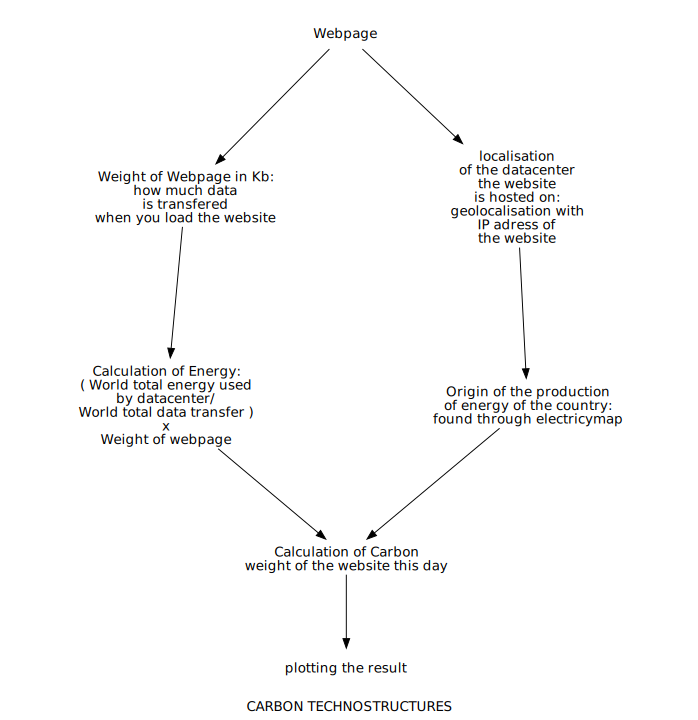

In [5]:
# Create a new directed graph with website

dot = graphviz.Digraph('pet-shop', node_attr={'fontname': 'Hershey-Noailles-futura'})
dot.attr(bgcolor='white')
dot.attr( size="10,10", ratio="fill",label="CARBON TECHNOSTRUCTURES", fontname='Hershey-Noailles-futura')
dot.attr(splines='true')
dot.attr(splines='true', rankdir='TB')
#dot.attr(splines='curve')

#dot.graph_attr['splines'] = 'true'
dot.attr('edge', arrowsize="1", dir="head",fontname = "menlo", overlap="False",color="black", weight="2",peripheries="2",)
dot.attr('node', stroke="2", size='30',shape='none')

# Add nodes and edges based on the sketch
dot.node('webpage', 'Webpage')
dot.node('weight', 'Weight of Webpage in Kb: \n how much data \nis transfered \n when you load the website')
dot.node('energy', 'Calculation of Energy: \n ( World total energy used \nby datacenter/ \nWorld total data transfer ) \n x \nWeight of webpage ')
dot.node('origin', 'localisation \nof the datacenter \n the website \nis hosted on: \n geolocalisation with \n IP adress of \nthe website')
dot.node('carbon', 'Calculation of Carbon \nweight of the website this day')
dot.node('plot', 'plotting the result')
dot.node('production', 'Origin of the production \n of energy of the country:\n found through electricymap')

# Create edges between nodes
dot.edge('webpage', 'weight')
dot.edge('webpage', 'origin')
dot.edge('weight', 'energy')
dot.edge('origin', 'production')
dot.edge('energy', 'carbon')
dot.edge('production', 'carbon')
dot.edge('carbon', 'plot')

# Display the graph
dot.render('carbon_calculus', format='svg')
dot

#### Adding the exhibition calculation

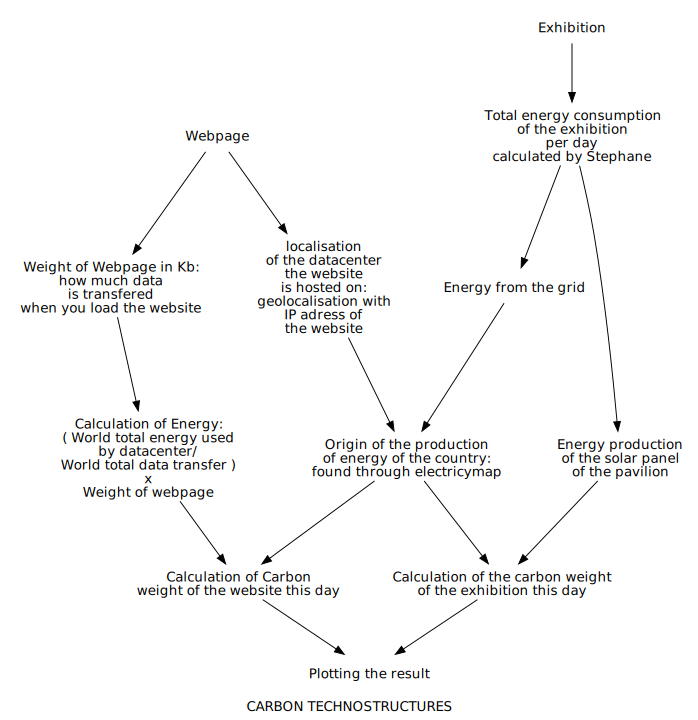

In [6]:
# Add nodes and edges based on the new configuration
dot.node('exhibition', 'Exhibition')
dot.node('exhibition Energy', 'Total energy consumption\nof the exhibition\nper day\ncalculated by Stephane')
dot.node('solar', 'Energy production\nof the solar panel\nof the pavilion')
dot.node('remaining', 'Energy from the grid')
dot.node('production', 'Origin of the production \n of energy of the country:\n found through electricymap')
dot.node('carbon_intensity', 'Calculation of the carbon weight\nof the exhibition this day')
dot.node('plot', 'Plotting the result')

# Create edges between nodes
dot.edge('exhibition', 'exhibition Energy')
dot.edge('exhibition Energy', 'solar')
dot.edge('exhibition Energy', 'remaining')
dot.edge('solar', 'carbon_intensity')
dot.edge('remaining', 'production')
dot.edge('production', 'carbon_intensity')
dot.edge('carbon_intensity', 'plot')

# Render the graph to a file
dot.render('exhibition_energy_graph', format='svg')
dot



## Turn the font into path using hershey

For this you need to have a special font file included in your repository

In [ ]:
import os
from lxml import etree as ET

class SVGFontLoader:
    def __init__(self, font_path):
        self.font_path = font_path
        self.glyphs = self.load_font()
    
    def load_font(self):
        tree = ET.parse(self.font_path)
        root = tree.getroot()
        namespace = {'svg': 'http://www.w3.org/2000/svg'}
        glyphs = {}

        for glyph in root.findall('.//svg:glyph', namespace):
            unicode_char = glyph.get('unicode')
            d = glyph.get('d')
            horiz_adv_x = glyph.get('horiz-adv-x')
            if unicode_char and d:
                glyphs[unicode_char] = {
                    'path': d,
                    'horiz_adv_x': float(horiz_adv_x) if horiz_adv_x else 0
                }

        return glyphs

    def get_path(self, char):
        return self.glyphs.get(char, {}).get('path', '')

    def get_horiz_adv_x(self, char):
        return self.glyphs.get(char, {}).get('horiz_adv_x', 0)

class SVGTextToPathsConverter:
    
    def get_default_space_width(self, font_size):
    # Use a proportion of the average character width as the default space width
        average_char_width = sum(self.font_loader.get_horiz_adv_x(char) for char in 'abcdefghijklmnopqrstuvwxyz') / 26
        return average_char_width * (font_size / 1000.0)

    def __init__(self, svg_content, font_loader):
        self.svg_content = svg_content
        self.font_loader = font_loader
        
    def calculate_total_line_width(self, text, font_size):
        total_width = 0
        space_width = self.font_loader.get_horiz_adv_x(' ') * (font_size / 1000.0)
        if space_width == 0:
            space_width = self.get_default_space_width(font_size)

        words = text.split()
        for word in words:
            for char in word:
                total_width += self.font_loader.get_horiz_adv_x(char) * (font_size / 1000.0)
            total_width += space_width  # Add space width after each word

        total_width -= space_width  # Remove the last added space width
        return total_width
    
    def convert_text_to_paths(self):
        # Remove XML declaration
        if self.svg_content.startswith('<?xml'):
            self.svg_content = self.svg_content.split('?>', 1)[1]

        parser = ET.XMLParser(remove_blank_text=True)
        root = ET.fromstring(self.svg_content, parser)
        namespaces = {'svg': 'http://www.w3.org/2000/svg'}

        for text_element in root.findall('.//svg:text', namespaces):
            text = text_element.text
            if text is None:
                continue

            x = float(text_element.get('x', '0'))
            y = float(text_element.get('y', '0'))
            font_size = float(text_element.get('font-size', '16'))
             # Calculate the total width of the text line
            total_line_width = self.calculate_total_line_width(text, font_size)

            # Adjust the starting position
            current_x = x - total_line_width / 2
            paths = []

            words = text.split()
            space_width = self.font_loader.get_horiz_adv_x(' ') * (font_size / 1000.0)
            if space_width == 0:
                space_width = self.get_default_space_width(font_size)
            for word in words:
                for char in word:
                    path_data = self.font_loader.get_path(char)
                    if path_data:
                        scaled_path_data = self.scale_path_data(path_data, font_size / 1000.0)
                        path_element = ET.Element('path')
                        path_element.set('d', scaled_path_data)
                        path_element.set('transform', f'translate({current_x},{y}) scale(1, -1)')

                        path_element.set('stroke', 'black')
                        path_element.set('stroke-width', '1')
                        path_element.set('fill', 'none')

                        paths.append(path_element)

                        current_x += self.font_loader.get_horiz_adv_x(char) * (font_size / 1000.0)

                # Add space width after each word
                current_x += space_width

            parent = text_element.getparent()
            parent.remove(text_element)
            for path_element in paths:
                parent.append(path_element)

        return ET.tostring(root, pretty_print=True, encoding='unicode')

    def convert_word_to_paths(self, word, word_center_x, y, font_size):
        word_paths = []
        current_x = word_center_x - sum(self.font_loader.get_horiz_adv_x(char) for char in word) * (font_size / 1000.0)

        for char in word:
            path_data = self.font_loader.get_path(char)
            if path_data:
                scaled_path_data = self.scale_path_data(path_data, font_size / 1000.0)
                path_element = ET.Element('path')
                path_element.set('d', scaled_path_data)
                path_element.set('transform', f'translate({current_x},{y}) scale(1, -1)')

                path_element.set('stroke', 'black')
                path_element.set('stroke-width', '1')
                path_element.set('fill', 'none')

                word_paths.append(path_element)
                current_x += self.font_loader.get_horiz_adv_x(char) * (font_size / 1000.0)

        return word_paths

    def scale_path_data(self, path_data, scale_factor):
        scaled_path = []
        commands = path_data.split()
        for command in commands:
            if command[0] in "MmLlHhVvCcSsQqTtAaZz":
                scaled_path.append(command)
            else:
                coords = command.split(',')
                scaled_coords = ','.join([str(float(coord) * scale_factor) for coord in coords])
                scaled_path.append(scaled_coords)
        return ' '.join(scaled_path)

    # Example usage
input_svg_path = 'file_in.svg'
output_svg_path = 'file_output.svg'
font_path = 'EMS_test.svg'  # Update this path to your SVG font file

# Load the SVG content
with open(input_svg_path, 'r') as file:
    svg_content = file.read()

# Initialize font loader and text converter
font_loader = SVGFontLoader(font_path)
converter = SVGTextToPathsConverter(svg_content, font_loader)

# Convert text to paths
new_svg_content = converter.convert_text_to_paths()

# Save the new SVG content
with open(output_svg_path, 'w') as file:
    file.write(new_svg_content)

print(f"SVG with text converted to paths saved as {output_svg_path}")

## Create the gcode from svg

In [ ]:
# Choose svg file that you want to change
input_svg_path = 'file_input.svg'

In [ ]:
# Step 3: Use vpype to process the new SVG file with paths
!vpype read {input_svg_path} scaleto 15cm 15cm linemerge -t 0.1mm linesimplify -t 0.3mm linesort write --page-size a4 --format svg --center bla_output.svg

print(f"SVG with paths saved to bla_output.svg")

## Changing the svg into gcode

Then you have to run the following command on the command line terminal.
The YAML file include the instruction to start the gcode

In [5]:

!juicy-gcode carbon_impact_graph.svg.svg -f flavor.yaml -o output_bla.gcode

#!path_to_juicygcode path_to_svg -f path_to_flavor_yaml path_to_output_file

/bin/bash: juicy-gcode: command not found


## Plotting the file

make sure your plotter is at 0,0 and plugged in both for energy and computer

### Starting the plotter

In [ ]:
import serial
import time
from datetime import datetime

def send_command(ser, command):
  print(command)
  start_time = datetime.now()
  ser.write(str.encode(command)) 
  #time.sleep(1)

  while True:
    line = ser.readline()
    print(line)

    if line == b'ok\r\n':
      break

#pbly change below for rasp this was for mac
ser = serial.Serial('/dev/tty.usbmodem201912341', 115200)
time.sleep(2)


### Running the gcode

In [ ]:
#WORKS
with open("gcode_file") as h:

    for line in h.readlines():
            send_command(ser,line)
